In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
from mlxtend.frequent_patterns import apriori, association_rules

In [9]:
from warnings import filterwarnings
filterwarnings("ignore")

In [11]:
df=pd.read_csv('Dataset14-Grocery-MarketBasket-Analysis.csv')
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [13]:
df.shape

(38765, 3)

In [15]:
df.columns

Index(['Member_number', 'Date', 'itemDescription'], dtype='object')

In [17]:
df.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

In [19]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [21]:
df.duplicated().any()

True

In [23]:
df[df.duplicated()]

,Member_number,Date,itemDescription
5015,2051,11-09-2015,frankfurter
5022,3055,18-08-2015,other vegetables
5044,1994,11-03-2015,whole milk
5055,1682,25-06-2015,pip fruit
5059,4324,05-01-2015,sausage
...,...,...,...
38614,2027,26-02-2014,domestic eggs
38684,2936,07-03-2014,newspapers
38685,2311,13-03-2014,pot plants
38722,3834,18-05-2014,salty snack


In [25]:
df1=df.drop_duplicates()

In [27]:
df1.shape

(38006, 3)

In [29]:
df1['Date']=pd.to_datetime(df['Date'])
df1.sort_values('Date')

,Member_number,Date,itemDescription
35406,3681,2014-01-01,dishes
12744,1789,2014-01-01,hamburger meat
13247,2610,2014-01-01,hamburger meat
26214,1249,2014-01-01,coffee
29730,4942,2014-01-01,frozen vegetables
...,...,...,...
17347,3971,2015-12-30,bottled beer
16428,2970,2015-12-30,meat
1134,4863,2015-12-30,dessert
34960,3562,2015-12-30,rolls/buns


In [31]:
df1.dtypes

Member_number               int64
Date               datetime64[ns]
itemDescription            object
dtype: object

In [33]:
df1.Member_number.nunique()

3898

In [35]:
df1.itemDescription.nunique()

167

In [37]:
df1.itemDescription.unique()

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [41]:
df1['itemDescription'].value_counts().head(10)

itemDescription
whole milk          2363
other vegetables    1827
rolls/buns          1646
soda                1453
yogurt              1285
root vegetables     1041
tropical fruit      1014
bottled water        908
sausage              903
citrus fruit         795
Name: count, dtype: int64

In [47]:
pd.crosstab(df1['Member_number'],df1['itemDescription'])

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [45]:
trans_df=pd.crosstab(df1['Member_number'],df1['itemDescription']).reset_index()
trans_df1=trans_df.set_index('Member_number')
trans_df1

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
4998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
item_list=df.itemDescription.unique()
item_list

array(['tropical fruit', 'whole milk', 'pip fruit', 'other vegetables',
       'rolls/buns', 'pot plants', 'citrus fruit', 'beef', 'frankfurter',
       'chicken', 'butter', 'fruit/vegetable juice',
       'packaged fruit/vegetables', 'chocolate', 'specialty bar',
       'butter milk', 'bottled water', 'yogurt', 'sausage', 'brown bread',
       'hamburger meat', 'root vegetables', 'pork', 'pastry',
       'canned beer', 'berries', 'coffee', 'misc. beverages', 'ham',
       'turkey', 'curd cheese', 'red/blush wine',
       'frozen potato products', 'flour', 'sugar', 'frozen meals',
       'herbs', 'soda', 'detergent', 'grapes', 'processed cheese', 'fish',
       'sparkling wine', 'newspapers', 'curd', 'pasta', 'popcorn',
       'finished products', 'beverages', 'bottled beer', 'dessert',
       'dog food', 'specialty chocolate', 'condensed milk', 'cleaner',
       'white wine', 'meat', 'ice cream', 'hard cheese', 'cream cheese ',
       'liquor', 'pickled vegetables', 'liquor (appetizer

In [51]:
rw=trans_df1.shape[0]
col=trans_df1.shape[1]
print(rw)
print(col)

3898
167


In [55]:
list_Item=[]
for i in range(rw):
    temp=[]
    for j in item_list:
        if trans_df.loc[i, j] >= 1:
            temp.append(j)
    list_Item.append(temp)
    
list_Item

[['whole milk',
  'yogurt',
  'sausage',
  'pastry',
  'canned beer',
  'misc. beverages',
  'soda',
  'pickled vegetables',
  'salty snack',
  'hygiene articles',
  'semi-finished bread'],
 ['whole milk',
  'rolls/buns',
  'beef',
  'frankfurter',
  'sausage',
  'soda',
  'curd',
  'whipped/sour cream',
  'white bread'],
 ['tropical fruit',
  'whole milk',
  'other vegetables',
  'butter',
  'butter milk',
  'sugar',
  'specialty chocolate',
  'frozen vegetables'],
 ['rolls/buns',
  'sausage',
  'root vegetables',
  'frozen meals',
  'detergent',
  'dental care'],
 ['tropical fruit',
  'whole milk',
  'pip fruit',
  'other vegetables',
  'rolls/buns',
  'packaged fruit/vegetables',
  'chocolate',
  'root vegetables',
  'pastry',
  'canned beer',
  'red/blush wine',
  'shopping bags',
  'dish cleaner',
  'cling film/bags',
  'frozen fish',
  'hygiene articles'],
 ['rolls/buns', 'margarine', 'whipped/sour cream'],
 ['whole milk',
  'rolls/buns',
  'frankfurter',
  'chicken',
  'chocolat

In [57]:
trans_df1['Item_List']=list_Item
trans_df1.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback,Item_List
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,1,0,"[whole milk, yogurt, sausage, pastry, canned b..."
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,1,0,2,0,0,"[whole milk, rolls/buns, beef, frankfurter, sa..."
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,"[tropical fruit, whole milk, other vegetables,..."
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,"[rolls/buns, sausage, root vegetables, frozen ..."
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,3,0,0,"[tropical fruit, whole milk, pip fruit, other ..."


In [59]:
basket_df=trans_df1[['Item_List']]
basket_df.head(10)

itemDescription,Item_List
Member_number,
1000,"[whole milk, yogurt, sausage, pastry, canned b..."
1001,"[whole milk, rolls/buns, beef, frankfurter, sa..."
1002,"[tropical fruit, whole milk, other vegetables,..."
1003,"[rolls/buns, sausage, root vegetables, frozen ..."
1004,"[tropical fruit, whole milk, pip fruit, other ..."
1005,"[rolls/buns, margarine, whipped/sour cream]"
1006,"[whole milk, rolls/buns, frankfurter, chicken,..."
1008,"[tropical fruit, yogurt, hamburger meat, root ..."
1009,"[tropical fruit, yogurt, pastry, herbs, newspa..."


In [61]:
trans_df2=trans_df1.drop(['Item_List'],axis=1)
trans_df2.head()

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,2,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,0,0


In [67]:
def encoded_units(x):
    if x<1:
        return 0
    if x>=1:
        return 1

basket_trans=trans_df2.applymap(encoded_units)
basket_trans.head(10)

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
1009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


trying out an sample item

In [70]:
whole_milk_df=basket_trans.loc[basket_trans['whole milk']==1]
whole_milk_df

itemDescription,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,bags,baking powder,bathroom cleaner,beef,berries,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
Member_number,,,,,,,,,,,,,,,,,,,,,
1000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
1001,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,1,0,1,0,0
1002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4985,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4986,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4991,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [72]:
frequent_itemsets=apriori(whole_milk_df,min_support=0.15,use_colnames=True)
frequent_itemsets

,support,itemsets
0,0.186450,(bottled beer)
1,0.245241,(bottled water)
2,0.152296,(brown bread)
3,0.190370,(canned beer)
4,0.201568,(citrus fruit)
5,0.153415,(domestic eggs)
6,0.157895,(newspapers)
7,0.417693,(other vegetables)
8,0.198768,(pastry)
9,0.189810,(pip fruit)


In [74]:
whole_milk_rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)

In [78]:
whole_milk_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(whole milk),(bottled beer),1.000000,0.186450,0.186450,0.186450,1.000000,1.0,0.000000,1.000000,0.000000,0.186450,0.000000,0.593225
1,(bottled beer),(whole milk),0.186450,1.000000,0.186450,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.186450,0.000000,0.593225
2,(whole milk),(bottled water),1.000000,0.245241,0.245241,0.245241,1.000000,1.0,0.000000,1.000000,0.000000,0.245241,0.000000,0.622620
3,(bottled water),(whole milk),0.245241,1.000000,0.245241,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.245241,0.000000,0.622620
4,(whole milk),(brown bread),1.000000,0.152296,0.152296,0.152296,1.000000,1.0,0.000000,1.000000,0.000000,0.152296,0.000000,0.576148
5,(brown bread),(whole milk),0.152296,1.000000,0.152296,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.152296,0.000000,0.576148
6,(whole milk),(canned beer),1.000000,0.190370,0.190370,0.190370,1.000000,1.0,0.000000,1.000000,0.000000,0.190370,0.000000,0.595185
7,(canned beer),(whole milk),0.190370,1.000000,0.190370,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.190370,0.000000,0.595185
8,(citrus fruit),(whole milk),0.201568,1.000000,0.201568,1.000000,1.000000,1.0,0.000000,inf,0.000000,0.201568,0.000000,0.600784
9,(whole milk),(citrus fruit),1.000000,0.201568,0.201568,0.201568,1.000000,1.0,0.000000,1.000000,0.000000,0.201568,0.000000,0.600784


In [76]:
whole_milk_rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
1,"(yogurt, whole milk)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
2,(yogurt),"(other vegetables, whole milk)",0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
3,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
4,"(other vegetables, whole milk)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
5,(other vegetables),"(yogurt, whole milk)",0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
6,(other vegetables),(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362
7,(rolls/buns),(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362
8,"(other vegetables, whole milk)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362
9,"(rolls/buns, whole milk)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362


In [84]:
def frequently_bought_together(item):
    item_df=basket_trans.loc[basket_trans[item]==1]
    fequent_itemsets=apriori(item_df,min_support=0.15,use_colnames=True)
    rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
    rules.sort_values(['lift','support'],ascending=False).reset_index(drop=True)
    print("Items frequently bought together with {0}".format(item))
    return rules['consequents'].unique()[:6]

In [86]:
frequently_bought_together('salty snack')

Items frequently bought together with salty snack


array([frozenset({'bottled beer'}), frozenset({'whole milk'}),
       frozenset({'bottled water'}), frozenset({'brown bread'}),
       frozenset({'canned beer'}), frozenset({'citrus fruit'})],
      dtype=object)

In [88]:
frequently_bought_together('ice cream')

Items frequently bought together with ice cream


array([frozenset({'bottled beer'}), frozenset({'whole milk'}),
       frozenset({'bottled water'}), frozenset({'brown bread'}),
       frozenset({'canned beer'}), frozenset({'citrus fruit'})],
      dtype=object)

In [90]:
frequently_bought_together('domestic eggs')

Items frequently bought together with domestic eggs


array([frozenset({'bottled beer'}), frozenset({'whole milk'}),
       frozenset({'bottled water'}), frozenset({'brown bread'}),
       frozenset({'canned beer'}), frozenset({'citrus fruit'})],
      dtype=object)

validation results

In [93]:
frequently_bought_together('chewing gum')

Items frequently bought together with chewing gum


array([frozenset({'bottled beer'}), frozenset({'whole milk'}),
       frozenset({'bottled water'}), frozenset({'brown bread'}),
       frozenset({'canned beer'}), frozenset({'citrus fruit'})],
      dtype=object)

In [97]:
df[df['Member_number']==2222]

,Member_number,Date,itemDescription
1631,2222,08-01-2015,yogurt
3796,2222,21-07-2015,berries
4881,2222,28-12-2015,whole milk
8433,2222,28-12-2015,sausage
10571,2222,13-02-2014,grapes
11296,2222,03-04-2014,pork
14695,2222,31-07-2014,sugar
15709,2222,21-07-2015,other vegetables
17780,2222,08-01-2015,dental care
19945,2222,21-07-2015,butter


top 10 association rule for specific item

In [104]:
cat_df=basket_trans.loc[basket_trans['whole milk']==1]
frequent_itemsets=apriori(cat_df,min_support=0.15,use_colnames=True)
rules=association_rules(frequent_itemsets,metric="lift",min_threshold=1)
top_rules=rules.sort_values(by='lift',ascending=False).head(10)
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
58,(yogurt),"(other vegetables, whole milk)",0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
56,"(yogurt, whole milk)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
21,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168
57,(other vegetables),"(yogurt, whole milk)",0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
55,"(other vegetables, whole milk)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
20,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168
42,"(other vegetables, whole milk)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362
47,(rolls/buns),"(other vegetables, whole milk)",0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362
43,"(rolls/buns, whole milk)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362
46,(other vegetables),"(rolls/buns, whole milk)",0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362


In [108]:
top_rules['antecedents_str']=top_rules['antecedents'].apply(lambda x:", ".join(list(x)))
top_rules['consequents_str']=top_rules['consequents'].apply(lambda x:", ".join(list(x)))
top_rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski,antecedents_str,consequents_str
58,(yogurt),"(other vegetables, whole milk)",0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168,yogurt,"other vegetables, whole milk"
56,"(yogurt, whole milk)",(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168,"yogurt, whole milk",other vegetables
21,(yogurt),(other vegetables),0.328667,0.417693,0.156775,0.477002,1.141991,1.0,0.019493,1.113401,0.185208,0.265907,0.101851,0.426168,yogurt,other vegetables
57,(other vegetables),"(yogurt, whole milk)",0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168,other vegetables,"yogurt, whole milk"
55,"(other vegetables, whole milk)",(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168,"other vegetables, whole milk",yogurt
20,(other vegetables),(yogurt),0.417693,0.328667,0.156775,0.375335,1.141991,1.0,0.019493,1.074708,0.213523,0.265907,0.069515,0.426168,other vegetables,yogurt
42,"(other vegetables, whole milk)",(rolls/buns),0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362,"other vegetables, whole milk",rolls/buns
47,(rolls/buns),"(other vegetables, whole milk)",0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362,rolls/buns,"other vegetables, whole milk"
43,"(rolls/buns, whole milk)",(other vegetables),0.389698,0.417693,0.179171,0.459770,1.100736,1.0,0.016397,1.077887,0.149954,0.285205,0.072259,0.444362,"rolls/buns, whole milk",other vegetables
46,(other vegetables),"(rolls/buns, whole milk)",0.417693,0.389698,0.179171,0.428954,1.100736,1.0,0.016397,1.068745,0.157163,0.285205,0.064323,0.444362,other vegetables,"rolls/buns, whole milk"


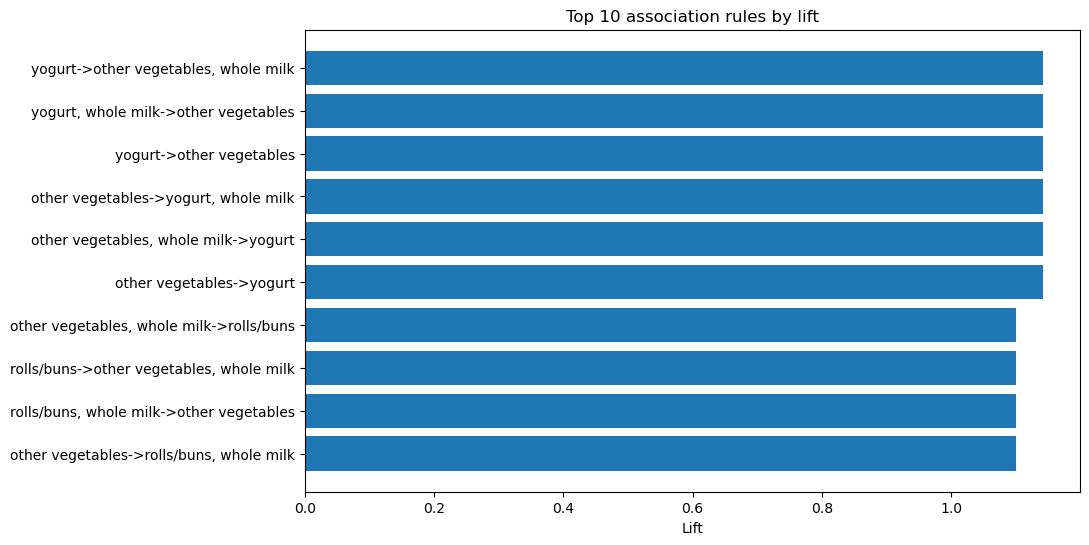

In [110]:
plt.figure(figsize=(10,6))
plt.barh(range(len(top_rules)),top_rules['lift'],tick_label=top_rules['antecedents_str']+'->'+top_rules['consequents_str'])
plt.xlabel('Lift')
plt.title('Top 10 association rules by lift')
plt.gca().invert_yaxis()
plt.show()